In [1]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

In [2]:
pair = "EURUSD"
granularity = "H1"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [3]:
df

,time,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,mid_o,mid_h,mid_l,mid_c
0,2024-07-12 04:00:00,1.08688,1.08711,1.08683,1.08698,1.08688,1.08711,1.08683,1.08698,1.086880,1.087110,1.086830,1.086980
1,2024-07-12 05:00:00,1.08702,1.08725,1.08677,1.08696,1.08702,1.08726,1.08677,1.08696,1.087020,1.087255,1.086770,1.086960
2,2024-07-12 06:00:00,1.08696,1.08723,1.08632,1.08650,1.08696,1.08723,1.08632,1.08650,1.086960,1.087230,1.086320,1.086500
3,2024-07-12 07:00:00,1.08650,1.08763,1.08618,1.08756,1.08650,1.08763,1.08618,1.08756,1.086500,1.087630,1.086180,1.087560
4,2024-07-12 08:00:00,1.08755,1.08873,1.08754,1.08868,1.08755,1.08873,1.08754,1.08868,1.087550,1.088730,1.087540,1.088680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-09-09 15:00:00,1.10421,1.10448,1.10355,1.10415,1.10422,1.10449,1.10356,1.10417,1.104215,1.104485,1.103555,1.104160
996,2024-09-09 16:00:00,1.10414,1.10507,1.10414,1.10487,1.10416,1.10509,1.10416,1.10488,1.104150,1.105080,1.104150,1.104875
997,2024-09-09 17:00:00,1.10487,1.10531,1.10434,1.10435,1.10489,1.10527,1.10435,1.10436,1.104880,1.105290,1.104345,1.104355
998,2024-09-09 18:00:00,1.10436,1.10463,1.10414,1.10429,1.10437,1.10465,1.10416,1.10430,1.104365,1.104640,1.104150,1.104295


In [15]:
df.shape

(1000, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1000 non-null   datetime64[ns]
 1   bid_o   1000 non-null   float64       
 2   bid_h   1000 non-null   float64       
 3   bid_l   1000 non-null   float64       
 4   bid_c   1000 non-null   float64       
 5   ask_o   1000 non-null   float64       
 6   ask_h   1000 non-null   float64       
 7   ask_l   1000 non-null   float64       
 8   ask_c   1000 non-null   float64       
 9   mid_o   1000 non-null   float64       
 10  mid_h   1000 non-null   float64       
 11  mid_l   1000 non-null   float64       
 12  mid_c   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 101.7 KB


In [34]:
df["sTime"] = [dt.datetime.strftime(x,"s%y-%m-%d %H:%M") for x in df.time]
df_plot = df.iloc[:100]


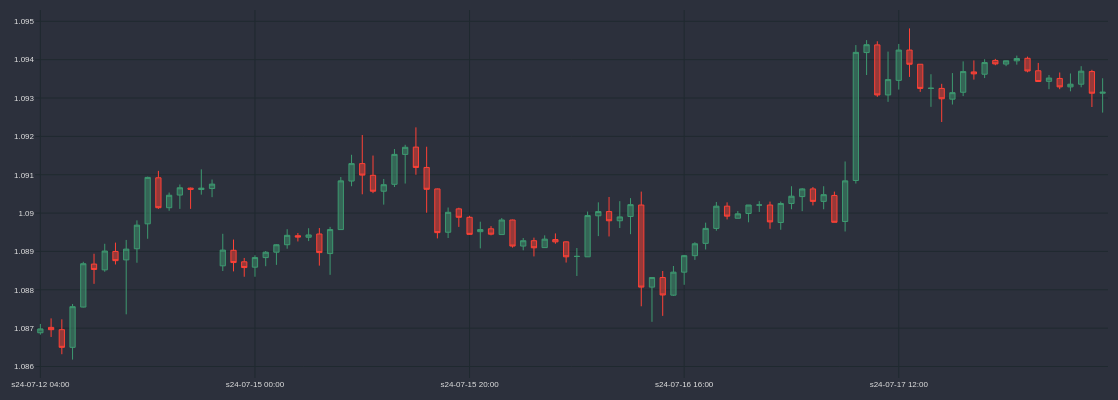

In [37]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x = df_plot.sTime,
    open = df_plot.mid_o,
    high = df_plot.mid_h,
    low = df_plot.mid_l,
    close = df_plot.mid_c,
    line=dict(width=1), opacity=1
))

fig.update_xaxes(
    gridcolor="#1f292f",
    rangeslider=dict(visible=False),
    nticks=5
)

fig.update_yaxes(
    gridcolor="#1f292f"
)

fig.update_layout(
    width=900,
    height=400,
    margin=dict(l=10, r=10, b=10, t=10),
    paper_bgcolor="#2c303c",
    plot_bgcolor="#2c303c",
    font=dict(size=8, color="#e1e1e1")
)

fig.show()